In [1]:
%matplotlib inline

In [ ]:
import random
import statistics
import numpy as np
import scipy.stats
import scipy
import perm._perm as perm
import perm.plot as plot
import matplotlib.pyplot as plt
import math

In [ ]:
# generate_chains (test)
num_monomers = 100
parameters_in = perm.parameters_in_t(num_monomers)
parameters_in.lattice = perm.lattice.d3_n6
num_chains = 10
method = "perm"
plot.plot_parameters_out_many_chains(parameters_out)
perm.generate_chains(num_chains=num_chains, parameters_in=parameters_in, method=method)
method = "rosenbluth"
parameters_out = perm.generate_chains(num_chains=num_chains, parameters_in=parameters_in, method=method)
plot.plot_parameters_out_many_chains(parameters_out)

In [3]:
# Draw one chain
# chain = perm.random_walk_lattice(N=20000, dim=3, neighbors=6)
# plot.plot_chain_2D(chain, 0, 1)
# plot.plot_chain_2D(chain, 0, 2)
# plot.plot_chain_2D(chain, 1, 2)
# plot.plot_chain(chain)
# chain = perm.random_walk_lattice(N=20000, dim=2, neighbors=8)
# plot.plot_chain_2D(chain)

# Draw many chains

average_ete_distance 14.847933637868545
expected_ete_distance 17.028336661462944
ratio 0.871954432958276


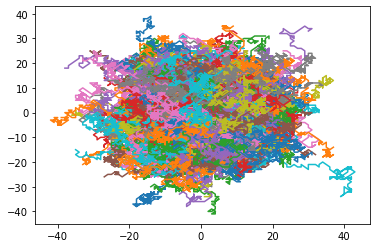

In [4]:
num_experiments = 1000

monomers = 200
bonds = monomers - 1
dim = 2
neighbors = 8
fig = plt.figure()
if dim == 2:
    ax = fig.add_subplot(111)
else:
    ax = fig.add_subplot(111, projection='3d')

ete_distances = []
for i in range(num_experiments):
    chain = perm.random_walk_lattice(N=monomers, dim=dim, neighbors=neighbors)
    ete_distances.append(chain.ete_distance())
    if dim == 2:
        plot.plot_chain_2D(chain, 0, 1, ax)
    else:
        plot.plot_chain(chain, ax)
average_ete_distance = sum(ete_distances)/num_experiments
expected_ete_distance = math.sqrt(bonds) * perm.bond_length_lattice(dim=dim, neighbors=neighbors)
print("average_ete_distance", average_ete_distance)
print("expected_ete_distance", expected_ete_distance)
print("ratio", average_ete_distance/expected_ete_distance)


# STATS

In [ ]:

num_experiments = 1000
monomers = 2000
bonds = monomers - 1
dim = 3
neighbors = 6

ete_distances = []
ete_vectors = []
for _ in range(num_experiments):
    chain = perm.random_walk_lattice(N=monomers, dim=dim, neighbors=neighbors)
    ete_distances.append(chain.ete_distance())
    ete_vectors.append(chain.ete_vector())

average_ete_distance = statistics.mean(ete_distances)
expected_ete_distance = math.sqrt(bonds) * perm.bond_length_lattice(dim=dim, neighbors=neighbors)
print("average_ete_distance", average_ete_distance)
print("expected_ete_distance", expected_ete_distance)
print("ratio", average_ete_distance/expected_ete_distance)
x_positions = [d[0] for d in ete_vectors]
y_positions = [d[1] for d in ete_vectors]
z_positions = [d[2] for d in ete_vectors]
average_pos_x = statistics.mean(x_positions)
average_pos_y = statistics.mean(y_positions)
average_pos_z = statistics.mean(z_positions)
print("average_pos", [average_pos_x, average_pos_y, average_pos_z])
print("expected_pos", [0, 0, 0])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
nbins = 100
hist_x, bins_x = np.histogram(x_positions, bins=nbins)
hist_y, bins_y = np.histogram(y_positions, bins=nbins)
hist_z, bins_z = np.histogram(z_positions, bins=nbins)
bins_x_centers = (bins_x[:-1] + bins_x[1:])/2
bins_y_centers = (bins_y[:-1] + bins_y[1:])/2
bins_z_centers = (bins_z[:-1] + bins_z[1:])/2

ax.bar(bins_x_centers, hist_x, zs=-1, zdir='y', label='x_pos')
ax.bar(bins_y_centers, hist_y, zs=0, zdir='y', label='y_pos')
ax.bar(bins_z_centers, hist_z, zs=1, zdir='y', label='z_pos')
ax.set_xlabel('displacement')
ax.set_ylabel('---')
ax.set_zlabel('counts')
ax.legend(loc='best')

fig = plt.figure()
ay = fig.add_subplot(111, projection='3d')
distro_x = scipy.stats.rv_histogram([hist_x, bins_x])
distro_y = scipy.stats.rv_histogram([hist_y, bins_y])
distro_z = scipy.stats.rv_histogram([hist_z, bins_z])
ay.plot(bins_x_centers, distro_x.pdf(bins_x_centers), zs=-1, zdir='y', label='xpos')
ay.plot(bins_y_centers, distro_y.pdf(bins_y_centers), zs=0, zdir='y', label='ypos')
ay.plot(bins_z_centers, distro_z.pdf(bins_z_centers), zs=1, zdir='y', label='zpos')
ay.set_xlabel('displacement')
ay.set_ylabel('---')
ay.set_zlabel('pdf (probability)')
ay.legend(loc='best')

In [ ]:
# # example pure python

In [ ]:

def bmean(neighbors):
    """Correct average kuhn monomer length for second nearest neighbors lattices"""
    bmean = 1
    if neighbors == 8:  # 2D
        bmean = (4*1 + 4*math.sqrt(2))/neighbors
    elif neighbors == 18:
        bmean = (6*1 + 12*math.sqrt(2))/neighbors
    elif neighbors == 26:
        bmean = (6*1 + 12*math.sqrt(2) + 8*math.sqrt(3))/neighbors

    return bmean

def choice_2d_4n():
    return random.choice(
        [np.array([-1, 0, 0]), np.array([0, -1, 0]),
         np.array([1, 0, 0]), np.array([0, 1, 0])])

def choice_3d_6n():
    return random.choice(
        [np.array([-1, 0, 0]), np.array([0, -1, 0]),
         np.array([1, 0, 0]), np.array([0, 1, 0]),
         np.array([0, 0, -1]), np.array([0, 0, 1])]
    )

def random_walk_lattice(monomers, dim):
    chain = []
    chain.append(np.array([0, 0, 0]))
    current_monomers = 1
    if(dim == 2):
        random_func = choice_2d_4n
    elif (dim == 3):
        random_func = choice_3d_6n
    else:
        raise "wrong dim"

    while (current_monomers < monomers):
        new_pos = random_func()
        chain.append(chain[-1] + new_pos)
        current_monomers += 1
    return chain


num_experiments = 1000
monomers = 200
bonds = monomers - 1
dim = 3
neighbors = 6
ete_distances = []
for _ in range(num_experiments):
    chain = random_walk_lattice(monomers, dim=dim)
    ete_distances.append(np.linalg.norm(chain[-1] - chain[0]))
    #print(chain[-1], ete_distances[-1])
# print(chain)

average_ete_distance = statistics.mean(ete_distances)
expected_ete_distance = math.sqrt(bonds)*bmean(neighbors)
print("average_ete_distance", average_ete_distance)
print("expected_ete_distance", expected_ete_distance)
print("ratio", average_ete_distance/expected_ete_distance)


# SAW: Self Avoiding Walk
simple sampling

In [ ]:
monomers = 20
mc_tries = 1000
lattice = perm.lattice.d2_n4
saw_chain = perm.mc_saw_simple_sampling(monomers=monomers, tries=mc_tries, lattice=lattice)
if saw_chain.monomers == 0:
    print("MC did not found a self avoiding walk.")
else:
    print(saw_chain)

plot.plot_chain_2D(saw_chain)

Rosenbluth sampling

In [ ]:
monomers = 10
mc_tries = 1000
lattice = perm.lattice.d2_n4
saw_chain, weight = perm.mc_saw_rosenbluth_sampling(monomers=monomers, tries=mc_tries, lattice=lattice)
if saw_chain.monomers == 0:
    print("MC did not found a self avoiding walk.")
else:
    print(saw_chain)
    print(weight)

plot.plot_chain_2D(saw_chain)

Draw many chains with rosenbluth samplings

In [ ]:
num_experiments = 1
monomers = 400
mc_tries = 10000
dim = 2
lattice = perm.lattice.d2_n4
fig = plt.figure()
if dim == 2:
    ax = fig.add_subplot(111)
else:
    ax = fig.add_subplot(111, projection='3d')

saw_chains = []
weights = []
for _ in range(num_experiments):
    saw_chain, weight = perm.mc_saw_rosenbluth_sampling(monomers=monomers, tries=mc_tries, lattice=lattice)
    saw_chains.append(saw_chain)
    weights.append(weight)
    if dim == 2:
        plot.plot_chain_2D(saw_chain, 0, 1, ax)
    else:
        plot.plot_chain(saw_chain, ax)
hist_weights, bins_weights = np.histogram(weights)
distro_weights = scipy.stats.rv_histogram([hist_weights, bins_weights])
fig = plt.figure()
ay = fig.add_subplot(111)
bins_weights_centers = (bins_weights[:-1] + bins_weights[1:])/2
ay.plot(bins_weights_centers, distro_weights.pdf(bins_weights_centers))
ay.set_xlabel('weights')
ay.set_ylabel('pdf')


PERM

In [ ]:
# perm uses recursion
num_experiments = 5
monomers = 400
mc_tries = 100000
# dim = 2
# lattice = perm.lattice.d2_n4
dim = 3
lattice = perm.lattice.d3_n26
k_bending = 5
energy_grow_func = perm.energy_grow_zero
# energy_grow_func = perm.energy_grow_bending(k=k_bending)
cube_half_side = 100
boundary_func = perm.boundary.is_inside_hyper_cube(half_side=cube_half_side)
half_side_x = 100
half_side_y = 100
half_side_z = 100
boundary_func = perm.boundary.is_inside_hyper_rectangle(half_side_x=half_side_x, half_side_y=half_side_y, half_side_z=half_side_z)
boundary_func = perm.boundary.is_inside_always
saw_chain, weight = perm.mc_saw_perm(monomers=monomers, tries=mc_tries,
                                     lattice=lattice, energy_grow_func=energy_grow_func,
                                     is_inside_boundary_func=boundary_func
                                     )
print("chain weight: ", weight)
print("ratio contour_length/ete_distance: ", saw_chain.contour_length()/saw_chain.ete_distance())
fig = plt.figure()
if dim == 2:
    ax = fig.add_subplot(111)
    plot.plot_chain_2D(saw_chain, 0, 1, ax)
else:
    ax = fig.add_subplot(111, projection='3d')
    plot.plot_chain(saw_chain, ax)

saw_chains = []
weights = []
for _ in range(num_experiments):
    saw_chain, weight = perm.mc_saw_perm(monomers=monomers, tries=mc_tries,
                                         lattice=lattice, energy_grow_func=energy_grow_func)
    saw_chains.append(saw_chain)
    weights.append(weight)
    if dim == 2:
        plot.plot_chain_2D(saw_chain, 0, 1, ax)
    else:
        plot.plot_chain(saw_chain, ax)

In [ ]:

# Estimate the partition function for a chain of n monomers
# <Z_m>_N = 1/N * sum(weight)
# The low and high thresholds, t_n and T_n are then chosen to be
# t_n = c*<Z_m>_N
# T_n = C*<Z_m>_N
# Where c, and C are fixed so C/c ~= 10

# First run regular Rosenbluth, with t_n = [0,...,0] and T_n = [inf, ..., inf]
# to compute a mean weight for the chain (at each length): Z_monomers
num_experiments = 1000
mc_tries = 100000
dim = 3
lattice = perm.lattice.d3_n26
k_bending = 3
energy_grow_func = perm.energy_grow_bending(k=k_bending)

max_monomers = 100
# The first weights are fixed and known
Z_monomers = [1.0, ]
for m in range(2, max_monomers):
    weights = []
    for _ in range(num_experiments):
        saw_chain, weight = perm.mc_saw_perm(monomers=m, tries=mc_tries, lattice=lattice,
                                             energy_grow_func=energy_grow_func)

        weights.append(weight)
    Z_monomers.append(sum(weights) / num_experiments)

# Perform PERM with thresholds
weight_high_constant = 5
weight_low_constant = 0.5
weight_threshold_high = [weight_high_constant * i for i in Z_monomers]
weight_threshold_low = [weight_low_constant * i for i in Z_monomers]
saw_chains = []
weights = []
# for _ in range(num_experiments):
for _ in range(10):
    saw_chain, weight = perm.mc_saw_perm(monomers=max_monomers, tries=mc_tries,
                                         lattice=lattice, energy_grow_func=energy_grow_func)
    saw_chains.append(saw_chain)
    weights.append(weight)

fig = plt.figure()
if dim == 2:
    ax = fig.add_subplot(111)
else:
    ax = fig.add_subplot(111, projection='3d')

for saw_chain in saw_chains:
    if dim == 2:
        plot.plot_chain_2D(saw_chain, 0, 1, ax)
    else:
        plot.plot_chain(saw_chain, ax)